In [34]:
# Importing libraries needed
import re 
from nltk import tokenize

from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator
from nltk import FreqDist


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [35]:
import pandas as pd

data = pd.read_csv('miguna_latest.csv')
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1519644754077753344,1519644754077753344,2022-04-28 11:48:37 UTC,2022-04-28,11:48:37,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1519642090862432258,1519642090862432258,2022-04-28 11:38:02 UTC,2022-04-28,11:38:02,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1519350946161217537,1519350946161217537,2022-04-27 16:21:08 UTC,2022-04-27,16:21:08,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1519348400671633413,1519325039165947904,2022-04-27 16:11:01 UTC,2022-04-27,16:11:01,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'senator047', 'name': 'Dedan kimathi', 'id': '1305109688283996160'}, {'screen_name': 'StateHouseKenya', 'name': 'State House Kenya', 'id': '364830542'}]",NaN,NaN,NaN,NaN
4,1519335863456518144,1519327543328976897,2022-04-27 15:21:12 UTC,2022-04-27,15:21:12,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FredrickOwok', 'name': 'Owoko', 'id': '1397544066049523714'}, {'screen_name': 'elonmusk', 'name': 'Elon Musk', 'id': '44196397'}]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43473,1080157229393870848,1080115632509726726,2019-01-01 17:42:06 UTC,2019-01-01,17:42:06,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AbdiwahabSheik7', 'name': 'Abdiwahab Sheikh Abdisamad', 'id': '1071772799465938947'}]",NaN,NaN,NaN,NaN
43474,1080115632509726726,1080115632509726726,2019-01-01 14:56:49 UTC,2019-01-01,14:56:49,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
43475,1080114097121882113,1080105607661801472,2019-01-01 14:50:42 UTC,2019-01-01,14:50:42,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'lexxieDallah', 'name': 'Leander Dallas', 'id': '788706969737687040'}]",NaN,NaN,NaN,NaN
43476,1080109543965773831,1080109543965773831,2019-01-01 14:32:37 UTC,2019-01-01,14:32:37,0,407781903,migunamiguna,Dr. Miguna Miguna,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [36]:
print(data.columns)
print(len(data.columns))

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')
36


Checking for missing values

In [37]:
data.isna().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              43478
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          38443
video                  0
thumbnail          41702
near               43478
geo                43478
source             43478
user_rt_id         43478
user_rt            43478
retweet_id         43478
reply_to               0
retweet_date       43478
translate          43478
trans_src          43478
trans_dest         43478
dtype: int64

In [38]:
# Dropping columns with missing values
data.drop(columns=['place','quote_url','thumbnail','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest'],inplace=True)

In [39]:
print(data.columns)
print(len(data.columns))

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to'],
      dtype='object')
23


Our columns have now reduced from 36 to 23

#### Sentiment Analysis

For this data, I will deal with tweats column so as to extract positive, negative and neutral tweets

In [40]:
# Checking for missing values

print(data['tweet'].isna().sum())


0


Our data set has no missing values

#### Visually Inspecting Features

In [41]:
pd.set_option('display.max_colwidth',None)

# Getting 5 samples of tweets
tweet_sample = data['tweet']

tweet_sample = [tweet_sample[val] for val in tweet_sample.index]

tweets_df = pd.DataFrame({'tweet': tweet_sample})

# Setting the display style
tweets_df.style.set_properties(**{'text-align': 'left'}) #This is to view the columns in full


tweets_df

,tweet
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga"
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi."
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?"
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?
...,...
43473,"@AbdiwahabSheik7 Those were not revolutions. They were civil/palace wars within the neocolonial ranks. Not every uprising is led and guided by revolutionary ideals. Anyone who calls the CIA-orchestrated turmoils in Somalia, Egypt, Libya and Tunisia revolutions don't know what a revolution is."
43474,"The only words I know are those of struggle, revolution and freedom. The only songs I sing are revolutionary freedom songs. The only lessons I learn are those of struggle, revolution and freedom. Our end game is freedom, social justice and integrity. We will not sing your songs!"
43475,"@lexxieDallah @kingbre68692918 I won't and cannot. My DNA is configured to violently resist slavery of every kind, stupidity, cowardice and greed."
43476,"On January 1, 2019, I've one simple message to Kenyan Patriots. (Don't comment if you are not a patriot.) Defying illegitimate and autocratic authority or person(s) is the FIRST STEP to freedom. Respect is earned. DEFY and RESIST everyone who steals, kills or mismanages Kenya."


From the above, I can see that the tweets have a mixture of uppercase and lowercase letters. And also have symbols, numbers and urls as part of tweets.
These won't be really helpful for our text classification task

#### PreProcessing the Text Data

##### 1. Standardizing Text

In [42]:
# Setting the display style
tweets_df.style.set_properties(**{'text-align': 'left'})
tweets_df["tweet"].str.lower()

0                        despot uhuru kenyatta's olympian performance is in drinking and looting dens and funeral committees of fallen thieves, tribalists and dictators. that's his 10 year legacy. kenyans must and will remember and punish him for that dubious legacy on august 9th.   #rejectrailaodinga
1                     president @nelsonhavi has been my lawyer. we don't agree on many issues. however, he will be the best mp for westlands. tim wanyonyi may be a good man. but he is a coward and has never legislated in parliament. parliament deserves eloquent and brilliant warriors like @nelsonhavi.
2                                 you have alleged that ruto has stolen more than uhuru kenyatta. #pandorapapers disclose that uhuru kenyatta has stolen and stashed more than sh 2.5 trillion in 9 nine years. from your argument, it implies that ruto is a trillionaire. is he broke or genuinely mourning?
3                                                                                          

 ##### 2. Removing Symbols

In [43]:
# Removing Symbols using RegEx
basic_token_pattern = r"(?u)\b(?:[^\W\d_]+|(?<=@)\w+)\b"

# Assuming 'tweets_df["tokenized_text"]' contains a list of strings
regex_text = tweets_df["tweet"].apply(lambda text: re.findall(basic_token_pattern, text))

# Display the first 10 tokenized texts
print(regex_text[:10])
# Setting the display style

0                   [Despot, Uhuru, Kenyatta, s, olympian, performance, is, in, drinking, and, LOOTING, DENS, and, FUNERAL, committees, of, fallen, thieves, tribalists, and, dictators, That, s, his, year, legacy, Kenyans, must, and, will, remember, and, punish, him, for, that, dubious, legacy, on, August, RejectRailaOdinga]
1    [President, NelsonHavi, has, been, my, lawyer, We, don, t, agree, on, many, issues, However, he, will, be, the, BEST, MP, for, Westlands, Tim, Wanyonyi, may, be, a, good, man, But, he, is, a, COWARD, and, has, never, LEGISLATED, in, Parliament, Parliament, DESERVES, eloquent, and, brilliant, WARRIORS, like, NelsonHavi]
2                        [You, have, alleged, that, Ruto, has, stolen, more, than, Uhuru, Kenyatta, PandoraPapers, disclose, that, Uhuru, Kenyatta, has, stolen, and, stashed, more, than, Sh, TRILLION, in, nine, years, From, your, argument, it, implies, that, Ruto, is, a, trillionaire, Is, he, broke, or, genuinely, mourning]
3                     

##### 3. Tokenizing

In [44]:
# Apply word tokenization using nltk
tokenized_texts = regex_text.apply(lambda tokens: tokenize.word_tokenize(" ".join(tokens)))

# Assign the tokenized texts to the DataFrame
tweets_df["tokenized_text"] = tokenized_texts

# Display the DataFrame
tweets_df


,tweet,tokenized_text
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga","[Despot, Uhuru, Kenyatta, s, olympian, performance, is, in, drinking, and, LOOTING, DENS, and, FUNERAL, committees, of, fallen, thieves, tribalists, and, dictators, That, s, his, year, legacy, Kenyans, must, and, will, remember, and, punish, him, for, that, dubious, legacy, on, August, RejectRailaOdinga]"
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.","[President, NelsonHavi, has, been, my, lawyer, We, don, t, agree, on, many, issues, However, he, will, be, the, BEST, MP, for, Westlands, Tim, Wanyonyi, may, be, a, good, man, But, he, is, a, COWARD, and, has, never, LEGISLATED, in, Parliament, Parliament, DESERVES, eloquent, and, brilliant, WARRIORS, like, NelsonHavi]"
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?","[You, have, alleged, that, Ruto, has, stolen, more, than, Uhuru, Kenyatta, PandoraPapers, disclose, that, Uhuru, Kenyatta, has, stolen, and, stashed, more, than, Sh, TRILLION, in, nine, years, From, your, argument, it, implies, that, Ruto, is, a, trillionaire, Is, he, broke, or, genuinely, mourning]"
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,"[senator047, StateHouseKenya, Where, is, credible, evidence, that, it, s, him, Show, a, time, stamped, image, with, him, inside, the, vehicle]"
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,"[FredrickOwok, elonmusk, My, Tweet, did, not, say, that, some, white, people, are, not, homeless]"
...,...,...
43473,"@AbdiwahabSheik7 Those were not revolutions. They were civil/palace wars within the neocolonial ranks. Not every uprising is led and guided by revolutionary ideals. Anyone who calls the CIA-orchestrated turmoils in Somalia, Egypt, Libya and Tunisia revolutions don't know what a revolution is.","[AbdiwahabSheik7, Those, were, not, revolutions, They, were, civil, palace, wars, within, the, neocolonial, ranks, Not, every, uprising, is, led, and, guided, by, revolutionary, ideals, Anyone, who, calls, the, CIA, orchestrated, turmoils, in, Somalia, Egypt, Libya, and, Tunisia, revolutions, don, t, know, what, a, revolution, is]"
43474,"The only words I know are those of struggle, revolution and freedom. The only songs I sing are revolutionary freedom songs. The only lessons I learn are those of struggle, revolution and freedom. Our end game is freedom, social justice and integrity. We will not sing your songs!","[The, only, words, I, know, are, those, of, struggle, revolution, and, freedom, The, only, songs, I, sing, are, revolutionary, freedom, songs, The, only, lessons, I, learn, are, those, of, struggle, revolution, and, freedom, Our, end, game, is, freedom, social, justice, and, integrity, We, will, not, sing, your, songs]"
43475,"@lexxieDallah @kingbre68692918 I won't and cannot. My DNA is configured to violently resist slavery of every kind, stupidity, cowardice and greed.","[lexxieDallah, kingbre68692918, I, won, t, and, can, not, My, DNA, is, configured, to, violently, resist, slavery, of, every, kind, stupidity, cowardice, and, greed]"
43476,"On January 1, 2019, I've one simple message to Kenyan Patriots. (Don't comment if you are not a patriot.) Defying illegitimate and autocratic authority or 

In [45]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VIVIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

For the code below, the compound score represents the overall sentiment of the text.It takes into account the positive, negative and neutral scores and compresses them into a normalized value between -1 and 1.
Greater than 0.05 - Indicates a positive socre
Greater than -0.05 but less than 0.05 - Indicates a neutral score
Less than -0.05 - Considered as a negative score

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

tweets_df['Negative'] = tweets_df['tweet'].apply(lambda text: sid.polarity_scores(text))
tweets_df

,tweet,tokenized_text,Negative
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga","[Despot, Uhuru, Kenyatta, s, olympian, performance, is, in, drinking, and, LOOTING, DENS, and, FUNERAL, committees, of, fallen, thieves, tribalists, and, dictators, That, s, his, year, legacy, Kenyans, must, and, will, remember, and, punish, him, for, that, dubious, legacy, on, August, RejectRailaOdinga]","{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.9317}"
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.","[President, NelsonHavi, has, been, my, lawyer, We, don, t, agree, on, many, issues, However, he, will, be, the, BEST, MP, for, Westlands, Tim, Wanyonyi, may, be, a, good, man, But, he, is, a, COWARD, and, has, never, LEGISLATED, in, Parliament, Parliament, DESERVES, eloquent, and, brilliant, WARRIORS, like, NelsonHavi]","{'neg': 0.099, 'neu': 0.661, 'pos': 0.24, 'compound': 0.8515}"
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?","[You, have, alleged, that, Ruto, has, stolen, more, than, Uhuru, Kenyatta, PandoraPapers, disclose, that, Uhuru, Kenyatta, has, stolen, and, stashed, more, than, Sh, TRILLION, in, nine, years, From, your, argument, it, implies, that, Ruto, is, a, trillionaire, Is, he, broke, or, genuinely, mourning]","{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.9274}"
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,"[senator047, StateHouseKenya, Where, is, credible, evidence, that, it, s, him, Show, a, time, stamped, image, with, him, inside, the, vehicle]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,"[FredrickOwok, elonmusk, My, Tweet, did, not, say, that, some, white, people, are, not, homeless]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
...,...,...,...
43473,"@AbdiwahabSheik7 Those were not revolutions. They were civil/palace wars within the neocolonial ranks. Not every uprising is led and guided by revolutionary ideals. Anyone who calls the CIA-orchestrated turmoils in Somalia, Egypt, Libya and Tunisia revolutions don't know what a revolution is.","[AbdiwahabSheik7, Those, were, not, revolutions, They, were, civil, palace, wars, within, the, neocolonial, ranks, Not, every, uprising, is, led, and, guided, by, revolutionary, ideals, Anyone, who, calls, the, CIA, orchestrated, turmoils, in, Somalia, Egypt, Libya, and, Tunisia, revolutions, don, t, know, what, a, revolution, is]","{'neg': 0.081, 'neu': 0.878, 'pos': 0.041, 'compound': -0.4215}"
43474,"The only words I know are those of struggle, revolution and freedom. The only songs I sing are revolutionary freedom songs. The only lessons I learn are those of struggle, revolution and freedom. Our end game is freedom, social justice and integrity. We will not sing your songs!","[The, only, words, I, know, are, those, of, struggle, revolution, and, freedom, The, only, songs, I, sing, are, revolutionary, freedom, songs, The, only, lessons, I, learn, are, those, of, struggle, revolution, and, freedom, Our, end, game, is, freedom, social, justice, and, integrity, We, will, not, sing, your, songs]","{'neg': 0.071, 'neu': 0.572, 'pos': 0.357, 'compound': 0.9661}"
43475,"@lexxieDallah @kingbre68692918

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initializing the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Using a function to fetch the scores
def sentiment_intensity_analyzer(text):
    scores = sid.polarity_scores(text)

    return scores['neg'],scores['pos'],scores['neu'],scores['compound']

# Applying the function and creating new columns
tweets_df[['Negative','Positive','Neutral','Compound']] = tweets_df['tweet'].apply(lambda x: pd.Series(sentiment_intensity_analyzer(x)))
tweets_df

,tweet,tokenized_text,Negative,Positive,Neutral,Compound
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga","[Despot, Uhuru, Kenyatta, s, olympian, performance, is, in, drinking, and, LOOTING, DENS, and, FUNERAL, committees, of, fallen, thieves, tribalists, and, dictators, That, s, his, year, legacy, Kenyans, must, and, will, remember, and, punish, him, for, that, dubious, legacy, on, August, RejectRailaOdinga]",0.293,0.000,0.707,-0.9317
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.","[President, NelsonHavi, has, been, my, lawyer, We, don, t, agree, on, many, issues, However, he, will, be, the, BEST, MP, for, Westlands, Tim, Wanyonyi, may, be, a, good, man, But, he, is, a, COWARD, and, has, never, LEGISLATED, in, Parliament, Parliament, DESERVES, eloquent, and, brilliant, WARRIORS, like, NelsonHavi]",0.099,0.240,0.661,0.8515
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?","[You, have, alleged, that, Ruto, has, stolen, more, than, Uhuru, Kenyatta, PandoraPapers, disclose, that, Uhuru, Kenyatta, has, stolen, and, stashed, more, than, Sh, TRILLION, in, nine, years, From, your, argument, it, implies, that, Ruto, is, a, trillionaire, Is, he, broke, or, genuinely, mourning]",0.278,0.000,0.722,-0.9274
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,"[senator047, StateHouseKenya, Where, is, credible, evidence, that, it, s, him, Show, a, time, stamped, image, with, him, inside, the, vehicle]",0.000,0.000,1.000,0.0000
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,"[FredrickOwok, elonmusk, My, Tweet, did, not, say, that, some, white, people, are, not, homeless]",0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...
43473,"@AbdiwahabSheik7 Those were not revolutions. They were civil/palace wars within the neocolonial ranks. Not every uprising is led and guided by revolutionary ideals. Anyone who calls the CIA-orchestrated turmoils in Somalia, Egypt, Libya and Tunisia revolutions don't know what a revolution is.","[AbdiwahabSheik7, Those, were, not, revolutions, They, were, civil, palace, wars, within, the, neocolonial, ranks, Not, every, uprising, is, led, and, guided, by, revolutionary, ideals, Anyone, who, calls, the, CIA, orchestrated, turmoils, in, Somalia, Egypt, Libya, and, Tunisia, revolutions, don, t, know, what, a, revolution, is]",0.081,0.041,0.878,-0.4215
43474,"The only words I know are those of struggle, revolution and freedom. The only songs I sing are revolutionary freedom songs. The only lessons I learn are those of struggle, revolution and freedom. Our end game is freedom, social justice and integrity. We will not sing your songs!","[The, only, words, I, know, are, those, of, struggle, revolution, and, freedom, The, only, songs, I, sing, are, revolutionary, freedom, songs, The, only, lessons, I, learn, are, those, of, struggle, revolution, and, freedom, Our, end, game, is, freedom, social, justice, and, integrity, We, will, not, sing, your, songs]",0.071,0.357,0.572,0.9661
43475,"@lexxieDallah @kingbre68692918 I won't and cannot. My DNA is configured to violently resist slavery of every kind, stupidity, cowardice and greed.","[lexxieDallah, kingbre68692918, I, won, t, and, can, not, My, DNA, is, configured, to, violently, re

In [48]:
# Getting the labels for whether a tweet is positive, negative or neutral

''' 
pd.cut is used to group the scores in the Compound column using the bins parameter. And it assigns labels to it.
float(-inf) - Represents negative infinity
float(inf) - Represents positive infinity
The code creates bins for values less than -0.05 , between -0.05 and 0.05 and greater than 0.05
'''
tweets_df['Sentiment'] = pd.cut(tweets_df['Compound'],
                                bins=[float('-inf'), -0.05, 0.05, float('inf')],
                                labels=['Negative', 'Neutral', 'Positive'],
                                include_lowest=True)

# Now tweets_df['Sentiment'] will have 'Negative', 'Neutral', or 'Positive' for each row
tweets_df

,tweet,tokenized_text,Negative,Positive,Neutral,Compound,Sentiment
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga","[Despot, Uhuru, Kenyatta, s, olympian, performance, is, in, drinking, and, LOOTING, DENS, and, FUNERAL, committees, of, fallen, thieves, tribalists, and, dictators, That, s, his, year, legacy, Kenyans, must, and, will, remember, and, punish, him, for, that, dubious, legacy, on, August, RejectRailaOdinga]",0.293,0.000,0.707,-0.9317,Negative
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.","[President, NelsonHavi, has, been, my, lawyer, We, don, t, agree, on, many, issues, However, he, will, be, the, BEST, MP, for, Westlands, Tim, Wanyonyi, may, be, a, good, man, But, he, is, a, COWARD, and, has, never, LEGISLATED, in, Parliament, Parliament, DESERVES, eloquent, and, brilliant, WARRIORS, like, NelsonHavi]",0.099,0.240,0.661,0.8515,Positive
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?","[You, have, alleged, that, Ruto, has, stolen, more, than, Uhuru, Kenyatta, PandoraPapers, disclose, that, Uhuru, Kenyatta, has, stolen, and, stashed, more, than, Sh, TRILLION, in, nine, years, From, your, argument, it, implies, that, Ruto, is, a, trillionaire, Is, he, broke, or, genuinely, mourning]",0.278,0.000,0.722,-0.9274,Negative
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,"[senator047, StateHouseKenya, Where, is, credible, evidence, that, it, s, him, Show, a, time, stamped, image, with, him, inside, the, vehicle]",0.000,0.000,1.000,0.0000,Neutral
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,"[FredrickOwok, elonmusk, My, Tweet, did, not, say, that, some, white, people, are, not, homeless]",0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...
43473,"@AbdiwahabSheik7 Those were not revolutions. They were civil/palace wars within the neocolonial ranks. Not every uprising is led and guided by revolutionary ideals. Anyone who calls the CIA-orchestrated turmoils in Somalia, Egypt, Libya and Tunisia revolutions don't know what a revolution is.","[AbdiwahabSheik7, Those, were, not, revolutions, They, were, civil, palace, wars, within, the, neocolonial, ranks, Not, every, uprising, is, led, and, guided, by, revolutionary, ideals, Anyone, who, calls, the, CIA, orchestrated, turmoils, in, Somalia, Egypt, Libya, and, Tunisia, revolutions, don, t, know, what, a, revolution, is]",0.081,0.041,0.878,-0.4215,Negative
43474,"The only words I know are those of struggle, revolution and freedom. The only songs I sing are revolutionary freedom songs. The only lessons I learn are those of struggle, revolution and freedom. Our end game is freedom, social justice and integrity. We will not sing your songs!","[The, only, words, I, know, are, those, of, struggle, revolution, and, freedom, The, only, songs, I, sing, are, revolutionary, freedom, songs, The, only, lessons, I, learn, are, those, of, struggle, revolution, and, freedom, Our, end, game, is, freedom, social, justice, and, integrity, We, will, not, sing, your, songs]",0.071,0.357,0.572,0.9661,Positive
43475,"@lexxieDallah @kingbre68692918 I won't and cannot. My DNA is configured to violently resist slavery of every kind, stupidity, cowardice and greed.","[lexxieDallah, kingbre686

Sentiment Distribution

In [49]:
tweets_df['Sentiment'].value_counts()

Negative    21354
Positive    13700
Neutral      8424
Name: Sentiment, dtype: int64

There are more negative counts from the tweet data set.

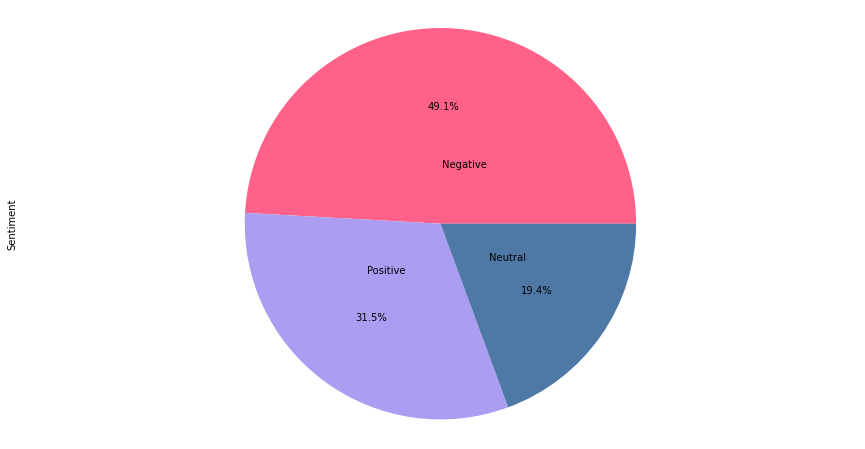

In [50]:
# Representing the sentiment distributions in a pie chart

tweets_df['Sentiment'].value_counts().plot(kind='pie',figsize=(15,8),labels=['Negative','Positive','Neutral'], labeldistance=0.3, autopct='%1.1f%%',colors=['#FF6188','#AB9DF2','#4e79a7'])
plt.axis('equal')
plt.show();  # The semicolon prevents the bounding box coordinates from being displayed

Now because we have the positive, negative and neutral sentiment we can split our datasets and fit it into a multinomial naive bayes classifier

Generating Word Cloud for the most common words in our dataset

In [51]:
from wordcloud import WordCloud

Splitting the DataSet into Train and Test

In [52]:
X = tweets_df['tokenized_text']
y = tweets_df['Sentiment']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

34782
8696
34782
8696


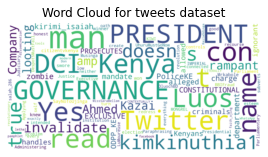

In [54]:
word_cloud = WordCloud(height=400,
                       width=800,
                       max_words=100,
                       scale=3,
                       max_font_size=100,
                       collocations=False,
                       background_color='white').generate(str(X_train))

#Creating a plot
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Word Cloud for tweets dataset')
plt.axis('Off')
plt.show();

Visualizing the Frequency Distribution for the train dataset

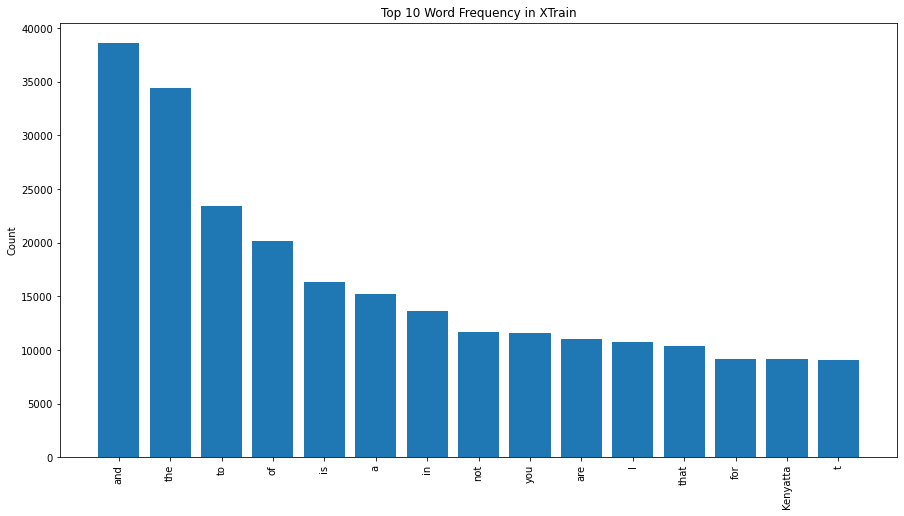

In [52]:
train_freq_dist = FreqDist(X_train.explode())

# Plotting the top 10 tokens
def visualize_top_10(freq_dist, title):
    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(15)))
    tokens = top_10[0]
    counts = top_10[1]

    # Plotting the data
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(tokens,counts)

    # The plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='x',rotation=90)

visualize_top_10(train_freq_dist,"Top 10 Word Frequency in XTrain")

From the visualization above, the most common words are stop words but I will not remove them because they may change the sentiment like from positive to negative or vice versa , or even neutral.


In [53]:
tweets_df

,tweet,tokenized_text,Negative,Positive,Neutral,Compound,Sentiment
0,"Despot Uhuru Kenyatta's olympian performance is in drinking and LOOTING DENS and FUNERAL committees of fallen thieves, tribalists and dictators. That's his 10 year legacy. Kenyans must and will remember and punish him for that dubious legacy on August 9th. #RejectRailaOdinga","[Despot, Uhuru, Kenyatta, s, olympian, performance, is, in, drinking, and, LOOTING, DENS, and, FUNERAL, committees, of, fallen, thieves, tribalists, and, dictators, That, s, his, year, legacy, Kenyans, must, and, will, remember, and, punish, him, for, that, dubious, legacy, on, August, RejectRailaOdinga]",0.293,0.000,0.707,-0.9317,Negative
1,"President @NelsonHavi has been my lawyer. We don't agree on many issues. However, he will be the BEST MP for Westlands. Tim Wanyonyi may be a good man. But he is a COWARD and has never LEGISLATED in Parliament. Parliament DESERVES eloquent and brilliant WARRIORS like @NelsonHavi.","[President, NelsonHavi, has, been, my, lawyer, We, don, t, agree, on, many, issues, However, he, will, be, the, BEST, MP, for, Westlands, Tim, Wanyonyi, may, be, a, good, man, But, he, is, a, COWARD, and, has, never, LEGISLATED, in, Parliament, Parliament, DESERVES, eloquent, and, brilliant, WARRIORS, like, NelsonHavi]",0.099,0.240,0.661,0.8515,Positive
2,"You have alleged that Ruto has stolen more than Uhuru Kenyatta. #PandoraPapers disclose that Uhuru Kenyatta has stolen and stashed more than Sh 2.5 TRILLION in 9 nine years. From your argument, it implies that Ruto is a trillionaire. Is he broke or genuinely mourning?","[You, have, alleged, that, Ruto, has, stolen, more, than, Uhuru, Kenyatta, PandoraPapers, disclose, that, Uhuru, Kenyatta, has, stolen, and, stashed, more, than, Sh, TRILLION, in, nine, years, From, your, argument, it, implies, that, Ruto, is, a, trillionaire, Is, he, broke, or, genuinely, mourning]",0.278,0.000,0.722,-0.9274,Negative
3,@senator047 @StateHouseKenya Where is credible evidence that it's him? Show a time-stamped image with him inside the vehicle.,"[senator047, StateHouseKenya, Where, is, credible, evidence, that, it, s, him, Show, a, time, stamped, image, with, him, inside, the, vehicle]",0.000,0.000,1.000,0.0000,Neutral
4,@FredrickOwok @elonmusk My Tweet did not say that some white people are not homeless?,"[FredrickOwok, elonmusk, My, Tweet, did, not, say, that, some, white, people, are, not, homeless]",0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...
43473,"@AbdiwahabSheik7 Those were not revolutions. They were civil/palace wars within the neocolonial ranks. Not every uprising is led and guided by revolutionary ideals. Anyone who calls the CIA-orchestrated turmoils in Somalia, Egypt, Libya and Tunisia revolutions don't know what a revolution is.","[AbdiwahabSheik7, Those, were, not, revolutions, They, were, civil, palace, wars, within, the, neocolonial, ranks, Not, every, uprising, is, led, and, guided, by, revolutionary, ideals, Anyone, who, calls, the, CIA, orchestrated, turmoils, in, Somalia, Egypt, Libya, and, Tunisia, revolutions, don, t, know, what, a, revolution, is]",0.081,0.041,0.878,-0.4215,Negative
43474,"The only words I know are those of struggle, revolution and freedom. The only songs I sing are revolutionary freedom songs. The only lessons I learn are those of struggle, revolution and freedom. Our end game is freedom, social justice and integrity. We will not sing your songs!","[The, only, words, I, know, are, those, of, struggle, revolution, and, freedom, The, only, songs, I, sing, are, revolutionary, freedom, songs, The, only, lessons, I, learn, are, those, of, struggle, revolution, and, freedom, Our, end, game, is, freedom, social, justice, and, integrity, We, will, not, sing, your, songs]",0.071,0.357,0.572,0.9661,Positive
43475,"@lexxieDallah @kingbre68692918 I won't and cannot. My DNA is configured to violently resist slavery of every kind, stupidity, cowardice and greed.","[lexxieDallah, kingbre686

In [20]:
'''
Like for example, tweet number 4 which says that '[FredrickOwok, elonmusk, My, Tweet, did, not, say, that, some, white, people, are, not, homeless]'
If we are to remove stop words, we would have:
'[FredrickOwok, elonmusk, Tweet,say that,white,people,homeless]'.
The meaning of the sentence has changed and the sentiment will change ,giving the wrong meaning
So I'll not remove stop words 
'''

"\nLike for example, tweet number 4 which says that '[FredrickOwok, elonmusk, My, Tweet, did, not, say, that, some, white, people, are, not, homeless]'\nIf we are to remove stop words, we would have:\n'[FredrickOwok, elonmusk, Tweet,say that,white,people,homeless]'.\nThe meaning of the sentence has changed and the sentiment will change to giving the wrong mean.\nSo I'll not remove stop words \n"

Word Frequencies for all tokens